In [55]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler

In [56]:
df = pd.read_csv("/Users/marco/Desktop/DataMining2Project-master-2/dataset_train+test2.csv") #sostituisci con tuo percorso
dateparse = lambda dates: pd.to_datetime(df['date'])

df_ts = pd.read_csv("/Users/marco/Desktop/DataMining2Project-master-2/dataset_train+test2.csv",
                 parse_dates=True, index_col='date', date_parser=dateparse)

In [57]:
df_ts.head()

,Temperature,Humidity,Light,CO2,Occupancy,Ora,day,hour,absH,weekend,out_of_turn
date,,,,,,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,1,2,4,17:51:00,17,0.0,1.0
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,1,2,4,17:51:59,17,0.0,1.0
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,1,2,4,17:53:00,17,0.0,1.0
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,1,2,4,17:54:00,17,0.0,1.0
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,1,2,4,17:55:00,17,0.0,1.0


In [58]:
df_ts = df_ts[[ 'Temperature', 'Occupancy', 'day']]

In [59]:
df_ts.head()

,Temperature,Occupancy,day
date,,,
2015-02-04 17:51:00,23.18,1,4
2015-02-04 17:51:59,23.15,1,4
2015-02-04 17:53:00,23.15,1,4
2015-02-04 17:54:00,23.15,1,4
2015-02-04 17:55:00,23.10,1,4


In [60]:
thur1 = df_ts[df_ts.day==5]
thur1 = thur1[['Temperature', 'Occupancy']]
thur1.reset_index(inplace=True)
ts1 = thur1.Temperature

fri1 = df_ts[df_ts.day==6]
fri1 = fri1[['Temperature', 'Occupancy']]
fri1.reset_index(inplace=True)
ts2 = fri1.Temperature

sat1 = df_ts[df_ts.day==7]
sat1 = sat1[['Temperature', 'Occupancy']]
sat1.reset_index(inplace=True)
#ts3 = sat1.Temperature

sun1 = df_ts[df_ts.day==8]
sun1 = sun1[['Temperature', 'Occupancy']]
sun1.reset_index(inplace=True)
#ts4 = sun1.Temperature

mon2 = df_ts[df_ts.day==9]
mon2 = mon2[['Temperature', 'Occupancy']]
mon2.reset_index(inplace=True)
ts5 = mon2.Temperature

thur2 = df_ts[df_ts.day==12]
thur2 = thur2[['Temperature', 'Occupancy']]
thur2.reset_index(inplace=True)
ts6 = thur2.Temperature

fri2 = df_ts[df_ts.day==13]
fri2 = fri2[['Temperature', 'Occupancy']]
fri2.reset_index(inplace=True)
ts7 = fri2.Temperature

sat2 = df_ts[df_ts.day==14]
sat2 = sat2[['Temperature', 'Occupancy']]
sat2.reset_index(inplace=True)
#ts8 = sat2.Temperature

sun2 = df_ts[df_ts.day==15]
sun2 = sun2[['Temperature', 'Occupancy']]
sun2.reset_index(inplace=True)
#ts9 = sun2.Temperature

mon3 = df_ts[df_ts.day==16]
mon3 = mon3[['Temperature', 'Occupancy']]
mon3.reset_index(inplace=True)
ts10 = mon3.Temperature

thue3 = df_ts[df_ts.day==17]
thue3 = thue3[['Temperature', 'Occupancy']]
thue3.reset_index(inplace=True)
ts11 = thue3.Temperature

In [61]:
ts_df = [ts1, ts2, ts5, ts6, ts7, ts10, ts11]

df1 = pd.DataFrame(data=ts_df)


In [62]:
df1

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
Temperature,21.245,21.245,21.26,21.245,21.245,21.29,21.245,21.29,21.29,21.29,...,20.29,20.245,20.29,20.29,20.29,20.29,20.2225,20.20,20.20,20.20
Temperature,20.200,20.200,20.20,20.200,20.200,20.20,20.200,20.20,20.20,20.20,...,20.00,19.945,19.89,19.89,19.89,19.89,20.0000,20.00,20.00,20.00
Temperature,19.500,19.500,19.50,19.500,19.500,19.50,19.500,19.50,19.50,19.50,...,20.39,20.390,20.39,20.39,20.39,20.39,20.3900,20.39,20.39,20.39
Temperature,20.600,20.550,20.60,20.600,20.600,20.55,20.600,20.60,20.60,20.60,...,21.00,21.000,21.00,21.00,21.00,21.00,21.0000,21.00,21.00,21.00
Temperature,21.050,21.000,21.00,21.000,21.000,21.00,21.000,21.00,21.00,21.00,...,20.00,20.000,20.00,20.05,20.00,20.02,20.1000,20.00,20.00,20.00
Temperature,20.260,20.200,20.29,20.250,20.290,20.29,20.290,20.29,20.26,20.29,...,20.20,20.200,20.20,20.25,20.20,20.25,20.2500,20.20,20.20,20.20
Temperature,20.200,20.150,20.10,20.100,20.100,20.10,20.100,20.10,20.10,20.15,...,20.89,20.890,20.89,20.89,20.89,20.89,20.8900,20.89,20.89,20.89


In [63]:
df1 = df1.transpose()

In [64]:
df1.head()

,Temperature,Temperature,Temperature,Temperature,Temperature,Temperature,Temperature
0,21.245,20.2,19.5,20.60,21.05,20.26,20.20
1,21.245,20.2,19.5,20.55,21.00,20.20,20.15
2,21.260,20.2,19.5,20.60,21.00,20.29,20.10
3,21.245,20.2,19.5,20.60,21.00,20.25,20.10
4,21.245,20.2,19.5,20.60,21.00,20.29,20.10


In [65]:
df1.insert(0, 'date', thur1.date)

In [66]:
df1.head()

,date,Temperature,Temperature,Temperature,Temperature,Temperature,Temperature,Temperature
0,2015-02-05 00:00:00,21.245,20.2,19.5,20.60,21.05,20.26,20.20
1,2015-02-05 00:01:00,21.245,20.2,19.5,20.55,21.00,20.20,20.15
2,2015-02-05 00:02:00,21.260,20.2,19.5,20.60,21.00,20.29,20.10
3,2015-02-05 00:03:00,21.245,20.2,19.5,20.60,21.00,20.25,20.10
4,2015-02-05 00:04:00,21.245,20.2,19.5,20.60,21.00,20.29,20.10


In [67]:
df1.columns = ['date', 'thursday1', 'friday1', 'monday2', 'thursday2', 
               'friday2', 'monday3', 'thuesday3']

In [68]:
df1.head()

,date,thursday1,friday1,monday2,thursday2,friday2,monday3,thuesday3
0,2015-02-05 00:00:00,21.245,20.2,19.5,20.60,21.05,20.26,20.20
1,2015-02-05 00:01:00,21.245,20.2,19.5,20.55,21.00,20.20,20.15
2,2015-02-05 00:02:00,21.260,20.2,19.5,20.60,21.00,20.29,20.10
3,2015-02-05 00:03:00,21.245,20.2,19.5,20.60,21.00,20.25,20.10
4,2015-02-05 00:04:00,21.245,20.2,19.5,20.60,21.00,20.29,20.10


In [69]:
df1.insert(8, 'Occupancy', thur1.Occupancy)

In [70]:
df1.head()

,date,thursday1,friday1,monday2,thursday2,friday2,monday3,thuesday3,Occupancy
0,2015-02-05 00:00:00,21.245,20.2,19.5,20.60,21.05,20.26,20.20,0
1,2015-02-05 00:01:00,21.245,20.2,19.5,20.55,21.00,20.20,20.15,0
2,2015-02-05 00:02:00,21.260,20.2,19.5,20.60,21.00,20.29,20.10,0
3,2015-02-05 00:03:00,21.245,20.2,19.5,20.60,21.00,20.25,20.10,0
4,2015-02-05 00:04:00,21.245,20.2,19.5,20.60,21.00,20.29,20.10,0


In [71]:
df1.to_csv(r'/Users/marco/Desktop/DataMining2Project-master-2/dataset_ts.csv', index = False)

In [72]:
df = pd.read_csv("/Users/marco/Desktop/DataMining2Project-master-2/dataset_ts.csv") 
dateparse = lambda dates: pd.to_datetime(df['date'])

df_ts1 = pd.read_csv("/Users/marco/Desktop/DataMining2Project-master-2/dataset_ts.csv",
                 parse_dates=True, index_col='date', date_parser=dateparse)

In [73]:
df_ts1.head()

,thursday1,friday1,monday2,thursday2,friday2,monday3,thuesday3,Occupancy
date,,,,,,,,
2015-02-05 00:00:00,21.245,20.2,19.5,20.60,21.05,20.26,20.20,0
2015-02-05 00:01:00,21.245,20.2,19.5,20.55,21.00,20.20,20.15,0
2015-02-05 00:02:00,21.260,20.2,19.5,20.60,21.00,20.29,20.10,0
2015-02-05 00:03:00,21.245,20.2,19.5,20.60,21.00,20.25,20.10,0
2015-02-05 00:04:00,21.245,20.2,19.5,20.60,21.00,20.29,20.10,0


In [74]:
import pandas as pd

from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

In [75]:
attributes = [col for col in df_ts1.columns if col != "Occupancy"]
X = df_ts1[attributes].values
y = df_ts1['Occupancy']

In [76]:
X.shape

(1440, 7)

In [90]:
#X1 = X.transpose()
n_ts, ts_sz = X.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.5,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 1440
ts_sz 7
n_classes 2
shapelet_sizes {3: 3}


In [91]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [92]:
shp_clf.fit(X, y)

Epoch 1/200
1440/1440 [==============================] - 0s 121us/step - loss: 0.6092 - binary_accuracy: 0.7833 - binary_crossentropy: 0.6045
Epoch 2/200
1440/1440 [==============================] - 0s 11us/step - loss: 0.5910 - binary_accuracy: 0.7854 - binary_crossentropy: 0.5863
Epoch 3/200
1440/1440 [==============================] - 0s 15us/step - loss: 0.5746 - binary_accuracy: 0.7889 - binary_crossentropy: 0.5698
Epoch 4/200
1440/1440 [==============================] - 0s 15us/step - loss: 0.5598 - binary_accuracy: 0.7931 - binary_crossentropy: 0.5549
Epoch 5/200
1440/1440 [==============================] - 0s 13us/step - loss: 0.5465 - binary_accuracy: 0.7979 - binary_crossentropy: 0.5415
Epoch 6/200
1440/1440 [==============================] - 0s 13us/step - loss: 0.5346 - binary_accuracy: 0.8014 - binary_crossentropy: 0.5294
Epoch 7/200
1440/1440 [==============================] - 0s 13us/step - loss: 0.5237 - binary_accuracy: 0.8056 - binary_crossentropy: 0.5184
Epoch 8/200


1440/1440 [==============================] - 0s 24us/step - loss: 0.4015 - binary_accuracy: 0.8444 - binary_crossentropy: 0.3908
Epoch 59/200
1440/1440 [==============================] - 0s 19us/step - loss: 0.4012 - binary_accuracy: 0.8444 - binary_crossentropy: 0.3905
Epoch 60/200
1440/1440 [==============================] - 0s 11us/step - loss: 0.4010 - binary_accuracy: 0.8444 - binary_crossentropy: 0.3902
Epoch 61/200
1440/1440 [==============================] - 0s 10us/step - loss: 0.4008 - binary_accuracy: 0.8444 - binary_crossentropy: 0.3900
Epoch 62/200
1440/1440 [==============================] - 0s 9us/step - loss: 0.4005 - binary_accuracy: 0.8444 - binary_crossentropy: 0.3897
Epoch 63/200
1440/1440 [==============================] - 0s 12us/step - loss: 0.4003 - binary_accuracy: 0.8444 - binary_crossentropy: 0.3895
Epoch 64/200
1440/1440 [==============================] - 0s 10us/step - loss: 0.4001 - binary_accuracy: 0.8444 - binary_crossentropy: 0.3892
Epoch 65/200
1440/14

1440/1440 [==============================] - 0s 13us/step - loss: 0.3963 - binary_accuracy: 0.8458 - binary_crossentropy: 0.3845
Epoch 116/200
1440/1440 [==============================] - 0s 17us/step - loss: 0.3962 - binary_accuracy: 0.8458 - binary_crossentropy: 0.3845
Epoch 117/200
1440/1440 [==============================] - ETA: 0s - loss: 0.3513 - binary_accuracy: 0.8750 - binary_crossentropy: 0.339 - 0s 27us/step - loss: 0.3962 - binary_accuracy: 0.8458 - binary_crossentropy: 0.3845
Epoch 118/200
1440/1440 [==============================] - 0s 112us/step - loss: 0.3962 - binary_accuracy: 0.8458 - binary_crossentropy: 0.3844
Epoch 119/200
1440/1440 [==============================] - 0s 21us/step - loss: 0.3962 - binary_accuracy: 0.8458 - binary_crossentropy: 0.3844
Epoch 120/200
1440/1440 [==============================] - 0s 18us/step - loss: 0.3961 - binary_accuracy: 0.8458 - binary_crossentropy: 0.3844
Epoch 121/200
1440/1440 [==============================] - 0s 18us/step - l

1440/1440 [==============================] - 0s 15us/step - loss: 0.3952 - binary_accuracy: 0.8465 - binary_crossentropy: 0.3836
Epoch 172/200
1440/1440 [==============================] - 0s 19us/step - loss: 0.3951 - binary_accuracy: 0.8465 - binary_crossentropy: 0.3836
Epoch 173/200
1440/1440 [==============================] - 0s 14us/step - loss: 0.3951 - binary_accuracy: 0.8465 - binary_crossentropy: 0.3836
Epoch 174/200
1440/1440 [==============================] - 0s 15us/step - loss: 0.3951 - binary_accuracy: 0.8465 - binary_crossentropy: 0.3836
Epoch 175/200
1440/1440 [==============================] - 0s 15us/step - loss: 0.3951 - binary_accuracy: 0.8465 - binary_crossentropy: 0.3836
Epoch 176/200
1440/1440 [==============================] - 0s 11us/step - loss: 0.3951 - binary_accuracy: 0.8465 - binary_crossentropy: 0.3836
Epoch 177/200
1440/1440 [==============================] - 0s 12us/step - loss: 0.3951 - binary_accuracy: 0.8465 - binary_crossentropy: 0.3836
Epoch 178/200

ShapeletModel(batch_size=256, max_iter=200, n_shapelets_per_size={3: 3},
              optimizer='sgd', random_state=None, shapelet_length=0.15,
              total_lengths=3, verbose=1, verbose_level=None,
              weight_regularizer=0.01)

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
predicted_labels = shp_clf.predict(X)
print("Correct classification rate:", accuracy_score(y, predicted_labels))

1440/1440 [==============================] - 0s 79us/step
Correct classification rate: 0.8465277777777778


In [95]:
predicted_locations = shp_clf.locate(X)

1440/1440 [==============================] - 0s 80us/step


/Users/marco/opt/anaconda3/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 1440 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


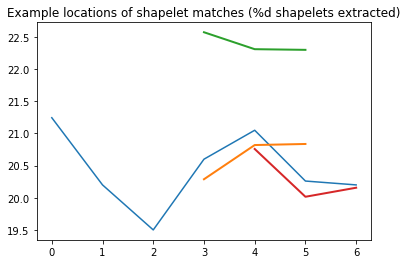

In [96]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

In [97]:
from shapelets_lts.classification import LtsShapeletClassifier

In [104]:
shp_clf = LtsShapeletClassifier(
    K=10,
    R=1,
    L_min=5,
    epocs=10,
    lamda=0.01,
    eta=0.01,
    shapelet_initialization='segments_centroids',
    plot_loss=False
)
"""
:param K: number of shapelets
:param R: scales of shapelet lengths
:param L_min: minimum shapelet length
"""

'\n:param K: number of shapelets\n:param R: scales of shapelet lengths\n:param L_min: minimum shapelet length\n'

In [105]:
shp_clf.fit(X, y)

Network initialization ...
Using training data to initialize shaplets
Training ...
Using training data for validation
epoch=1/10 (iteration=1440) loss=0.03321716722847984 validation accuracy=0.6256944444444444
epoch=2/10 (iteration=2880) loss=0.046300871355827306 validation accuracy=0.6256944444444444
epoch=3/10 (iteration=4320) loss=0.04429726941842106 validation accuracy=0.7347222222222223
epoch=4/10 (iteration=5760) loss=0.044998722914851005 validation accuracy=0.76875
epoch=5/10 (iteration=7200) loss=0.041213333579785835 validation accuracy=0.7847222222222222
epoch=6/10 (iteration=8640) loss=0.034694281141729524 validation accuracy=0.7951388888888888
epoch=7/10 (iteration=10080) loss=0.0314902531846733 validation accuracy=0.7972222222222223
epoch=8/10 (iteration=11520) loss=0.03015075860076083 validation accuracy=0.7972222222222223
epoch=9/10 (iteration=12960) loss=0.028912747490348903 validation accuracy=0.7847222222222222
epoch=10/10 (iteration=14400) loss=0.027703747973554682 va

LtsShapeletClassifier(K=10, L_min=5, R=1, alpha=-100, epocs=10, eta=0.01,
                      lamda=0.01, plot_loss=False,
                      shapelet_initialization='segments_centroids')

In [106]:
y_pred = shp_clf.predict(X)

print("Correct classification rate:", accuracy_score(y, y_pred))

Correct classification rate: 0.7555555555555555


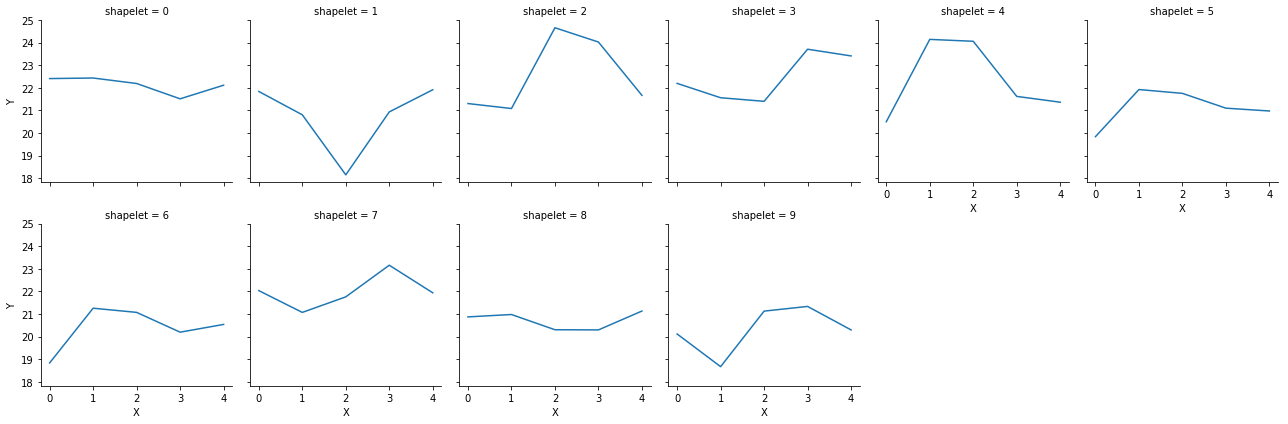

In [107]:
# retrieve the learnt shapelets
shapelets = shp_clf.get_shapelets()

# and plot sample shapelets
from shapelets_lts.util import plot_sample_shapelets
plot_sample_shapelets(shapelets=shapelets, sample_size=36)